In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sim1 = pd.read_csv('rrBLUP_output/test_sim_WF_1kbt_10000n_5000000_pheno_pred.txt', sep=",")
sim2 = pd.read_csv('rrBLUP_output/test_sim_WF_10kbt_10000n_5000000_pheno_pred.txt', sep=",")
sim3 = pd.read_csv('rrBLUP_output/test_sim_WF_null_10000n_5000000_pheno_pred.txt', sep=",")

In [4]:
sim1['scenario'] = '1kb_bottleneck'
sim1['trait_architecture'] = ((sim1['trait'] - 1) // 5) + 1
sim1['replicate'] = ((sim1['trait'] - 1) % 5) + 1

sim2['scenario'] = '1kb_bottleneck'
sim2['trait_architecture'] = ((sim2['trait'] - 1) // 5) + 1
sim2['replicate'] = ((sim2['trait'] - 1) % 5) + 1

sim3['scenario'] = '1kb_bottleneck'
sim3['trait_architecture'] = ((sim3['trait'] - 1) // 5) + 1
sim3['replicate'] = ((sim3['trait'] - 1) % 5) + 1

#sim1

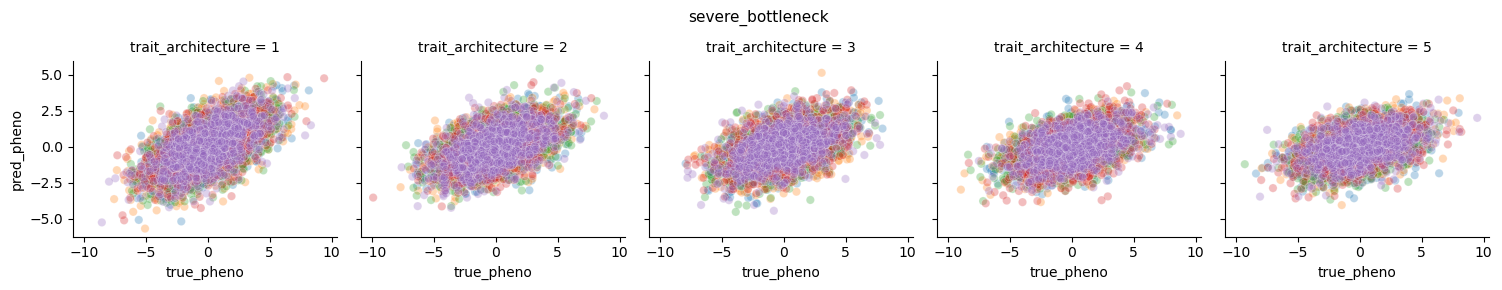

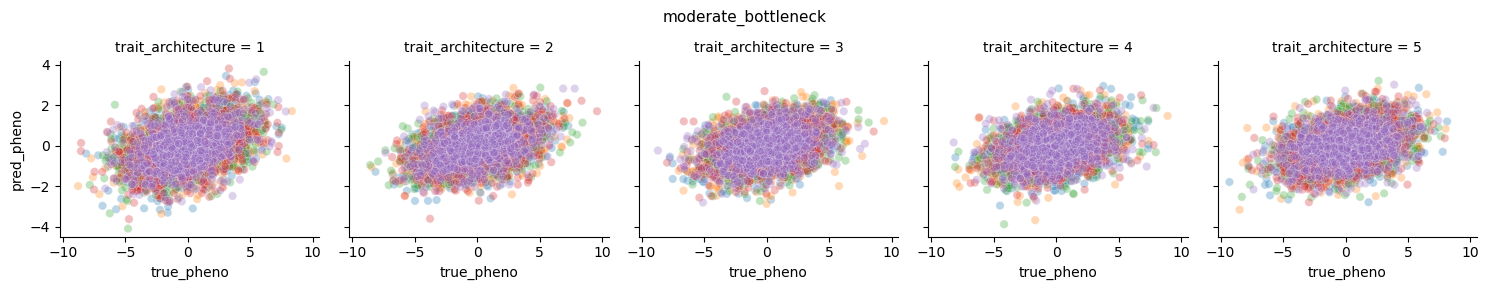

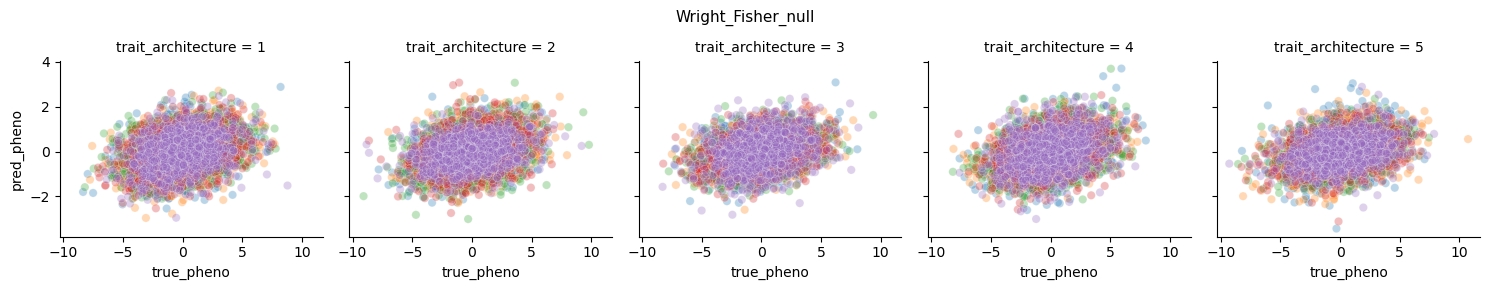

In [5]:
g1 = sns.FacetGrid(sim1, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g1.fig.suptitle("severe_bottleneck", fontsize=11, y=0.95)
g1.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

g2 = sns.FacetGrid(sim2, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g2.fig.suptitle("moderate_bottleneck", fontsize=11, y=0.95)
g2.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

g3 = sns.FacetGrid(sim3, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g3.fig.suptitle("Wright_Fisher_null", fontsize=11, y=0.95)
g3.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)


In [6]:
summary1 = pd.read_csv('rrBLUP_output/test_sim_WF_1kbt_10000n_5000000_corr_sumary.txt', sep=",")
summary2 = pd.read_csv('rrBLUP_output/test_sim_WF_10kbt_10000n_5000000_corr_sumary.txt', sep=",")
summary3 = pd.read_csv('rrBLUP_output/test_sim_WF_null_10000n_5000000_corr_sumary.txt', sep=",")

In [7]:
summary1['sim_scenario'] = 'severe_bottleneck'
summary2['sim_scenario'] = 'moderate_bottleneck'
summary3['sim_scenario'] = 'WF_null'



summary = pd.concat([summary1, summary2,  summary3])

summary['trait_architecture'] = ((summary['trait'] - 1) // 5) + 1
summary

,trait,pearson_corr,best_lambda,sim_scenario,trait_architecture
0,1,0.615770,15264.179672,severe_bottleneck,1
1,2,0.588327,15264.179672,severe_bottleneck,1
2,3,0.607109,15264.179672,severe_bottleneck,1
3,4,0.611950,15264.179672,severe_bottleneck,1
4,5,0.612026,15264.179672,severe_bottleneck,1
...,...,...,...,...,...
20,21,0.281136,4941.713361,WF_null,5
21,22,0.328668,4941.713361,WF_null,5
22,23,0.299345,7196.856730,WF_null,5
23,24,0.303134,7196.856730,WF_null,5


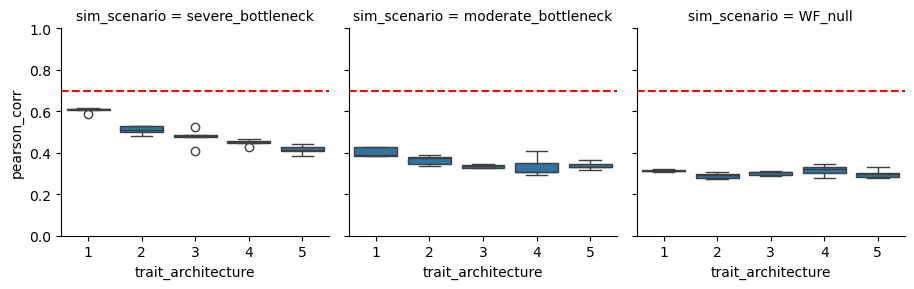

In [18]:
gsum = sns.FacetGrid(summary, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="pearson_corr")
gsum.set(ylim=(0, 1))
gsum.map(plt.axhline, y=0.7, color='red', linestyle='--')


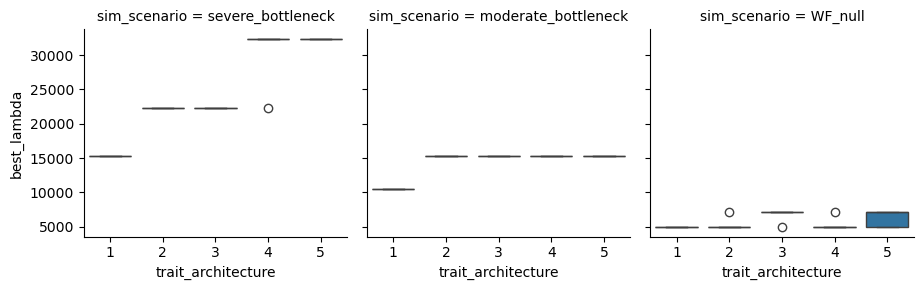

In [9]:
gsum = sns.FacetGrid(summary, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="best_lambda")

In [3]:
import pyreadr
result = pyreadr.read_r('alphasimr_output/test_sim_WF_1kbt_10000n_5000000bp_trait_architecture.RDS') # also works for RData


In [20]:
result

OrderedDict()